In [1]:
# Отключение предупреждений
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import fashion_mnist
import numpy as np
from skimage.io import imread
import sys
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Using TensorFlow backend.


In [3]:
# Чтение разметки данных
data = pd.read_csv('train_digitStruct.csv')
data_test = pd.read_csv('test_digitStruct.csv')

In [4]:
# Удаление некорректных данных
data = data[(data['Top'] > 0) & (data['Left'] > 0)]
data_test = data_test[(data_test['Top'] > 0) & (data_test['Left'] > 0)]

In [91]:
data.describe()

,DigitLabel,Left,Top,Width,Height
count,73104.000000,73104.000000,73104.000000,73104.000000,73104.000000
mean,4.506361,58.471985,11.891921,16.650895,33.853756
std,2.891253,41.882026,14.462116,10.678751,18.591050
min,1.000000,1.000000,1.000000,1.000000,9.000000
25%,2.000000,30.000000,4.000000,10.000000,21.000000
50%,4.000000,46.000000,7.000000,14.000000,29.000000
75%,7.000000,73.000000,15.000000,21.000000,41.000000
max,10.000000,618.000000,219.000000,207.000000,403.000000


In [5]:
# Функция изменения размера и обрезки изображения
def get_image(FileName, folder, Top, Left, Height, Width):
    Full_filename = folder + '/' + folder + '/' + str(FileName)
    im = imread(Full_filename)
    grayscale = rgb2gray(im).astype(np.float32)
    grayscale_cut = grayscale[Top:Top+Height, Left:Left+Width]
    grayscale_resize = resize(grayscale_cut,(64,32))
    return grayscale_resize

In [6]:
# Функция вывода изображения для демонстрации

def img_print(im):
    fig, ax = plt.subplots()

    ax.imshow(im, cmap=plt.cm.gray)

    fig.set_figwidth(10)    #  ширина и
    fig.set_figheight(10)    #  высота "Figure"
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

def alt_print(im):
    fig, axes = plt.subplots()
    #ax = axes.ravel()

    ax[0].imshow(im)
    ax[0].set_title("Result")
    #ax[1].imshow(grayscale, cmap=plt.cm.gray)
    #ax[1].set_title("Grayscale")

    fig.tight_layout()
    plt.show()

In [7]:
X_train = []
Y_train = []
X_test = []
Y_test = []

# формирование датасета с лейблами
def X_Y_formator(data, folder, X, Y):
    for i in range(len(data)):
        try:
            X.append(get_image(data['FileName'].iloc[i], folder, data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))
            Y.append(data['DigitLabel'].iloc[i])
        except Exception as e:
            print(f'Eroor: {e}')
            print(f"In file: {data['FileName'].iloc[i]}, folder: {folder}, Top: {data['Top'].iloc[i]}, Left: {data['Left'].iloc[i]}, Height: {data['Height'].iloc[i]}, Width: {data['Width'].iloc[i]}")

def X_Y_formator_old(data, folder, X, Y):
    for i in range(len(data)):
        # print(i)
        try:
            X.append(get_image(data['FileName'].iloc[i], folder, data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))
            Y.append(data['DigitLabel'].iloc[i])
        except:
            print(data['FileName'].iloc[i], folder)

In [ ]:
# get_image(data['FileName'].iloc[i], data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))

In [8]:
X_Y_formator(data, 'train', X_train, Y_train)

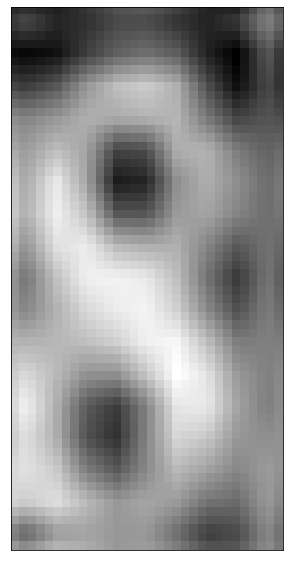

8


In [9]:
img_print(X_train[1666])
print(Y_train[1666])

In [10]:
X_Y_formator(data_test, 'test', X_test, Y_test)

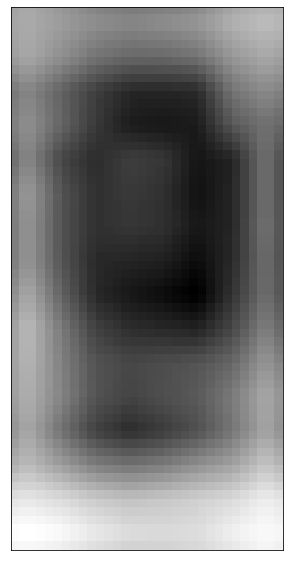

9


In [12]:
img_print(X_test[500])
print(Y_test[500])

In [13]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
#arr.shape()]

In [ ]:
#X_Y_formator(data_test, X_test, Y_test)

(64, 32)


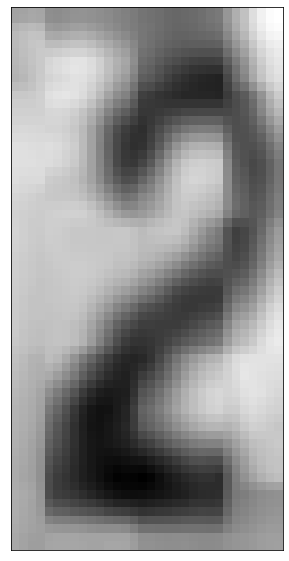

In [20]:
#im_test = imread("train/train/2.png")
#print(im_test.shape)
im_test_resize = resize(X_train[394],(64,32))
print(im_test_resize.shape)

img_print(im_test_resize)



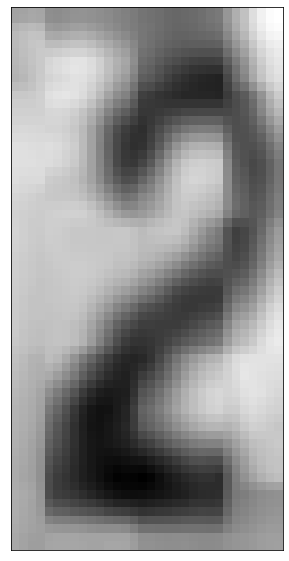

In [21]:
img_print(im_test_resize)

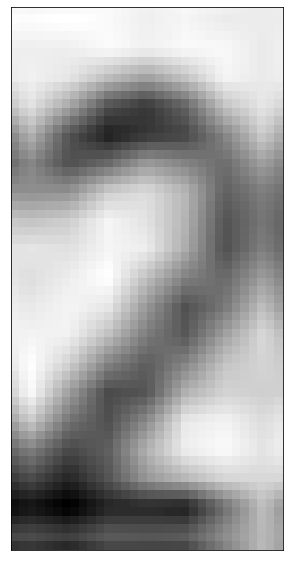

2

In [11]:
img_print(X_train[40])
Y_train[40]

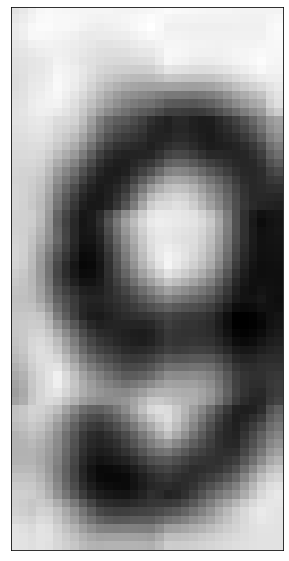

9

In [14]:
img_print(X_test[345])
Y_test[345]

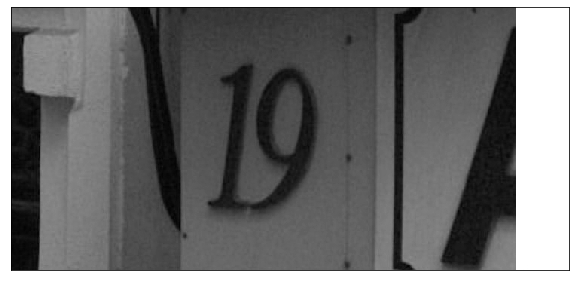

In [25]:
img_print(grayscale)

In [15]:
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
# X_test = np.array(X_test)
# Y_test = np.array(Y_test)

train_X = X_train
train_Y = Y_train
test_X = X_test
test_Y = Y_test

In [16]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (73104, 64, 32) (73104,)
Testing data shape :  (25990, 64, 32) (25990,)


In [17]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [ 1  2  3  4  5  6  7  8  9 10]


Text(0.5, 1.0, 'Ground Truth : 8')

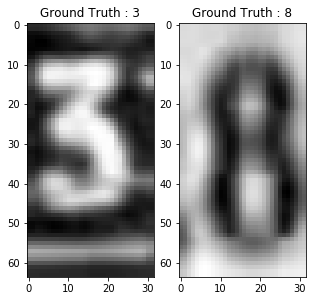

In [22]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[120,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[120]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[120,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[120]))

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X = train_X / 255.
# test_X = test_X / 255.

In [25]:
train_X = train_X.reshape(-1, 64,32, 1)
test_X = test_X.reshape(-1, 64,32, 1)
train_X.shape, test_X.shape

((73104, 64, 32, 1), (25990, 64, 32, 1))

In [26]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [28]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((58483, 64, 32, 1), (14621, 64, 32, 1), (58483, 11), (14621, 11))

In [29]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [30]:
batch_size = 64
epochs = 6
num_classes = 11

In [31]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,32,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [32]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [33]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 8, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 8, 128)       

In [34]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 58483 samples, validate on 14621 samples
Epoch 1/6
58483/58483 [==============================] - 523s 9ms/step - loss: 0.8580 - accuracy: 0.7308 - val_loss: 0.4627 - val_accuracy: 0.8677
Epoch 2/6
58483/58483 [==============================] - 495s 8ms/step - loss: 0.4094 - accuracy: 0.8807 - val_loss: 0.3668 - val_accuracy: 0.8934
Epoch 3/6
58483/58483 [==============================] - 488s 8ms/step - loss: 0.3302 - accuracy: 0.9028 - val_loss: 0.3670 - val_accuracy: 0.8946
Epoch 4/6
58483/58483 [==============================] - 528s 9ms/step - loss: 0.2782 - accuracy: 0.9185 - val_loss: 0.3272 - val_accuracy: 0.9068
Epoch 5/6
58483/58483 [==============================] - 526s 9ms/step - loss: 0.2364 - accuracy: 0.9296 - val_loss: 0.3113 - val_accuracy: 0.9132
Epoch 6/6
58483/58483 [==============================] - 461s 8ms/step - loss: 0.2019 - accuracy: 0.9393 - val_loss: 0.3314 - val_accuracy: 0.9071


In [35]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4125351278844858
Test accuracy: 0.8862254619598389


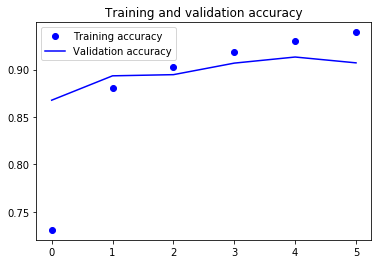

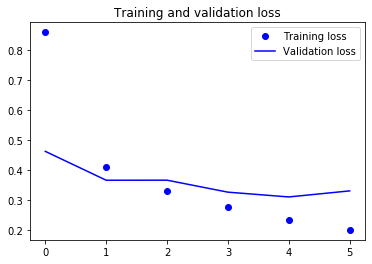

In [36]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# batch_size = 64
# epochs = 20
# num_classes = 10

# fashion_model = Sequential()
# fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
# fashion_model.add(LeakyReLU(alpha=0.1))
# fashion_model.add(MaxPooling2D((2, 2),padding='same'))
# fashion_model.add(Dropout(0.25))
# fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))
# fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# fashion_model.add(Dropout(0.25))
# fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# fashion_model.add(LeakyReLU(alpha=0.1))                  
# fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# fashion_model.add(Dropout(0.4))
# fashion_model.add(Flatten())
# fashion_model.add(Dense(128, activation='linear'))
# fashion_model.add(LeakyReLU(alpha=0.1))           
# fashion_model.add(Dropout(0.3))
# fashion_model.add(Dense(num_classes, activation='softmax'))

# fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Shape of image: (67, 42, 3)
Original image:


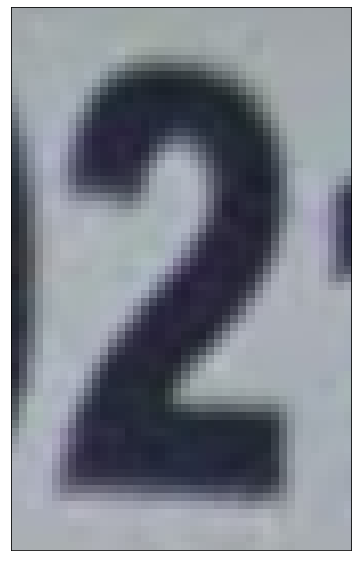

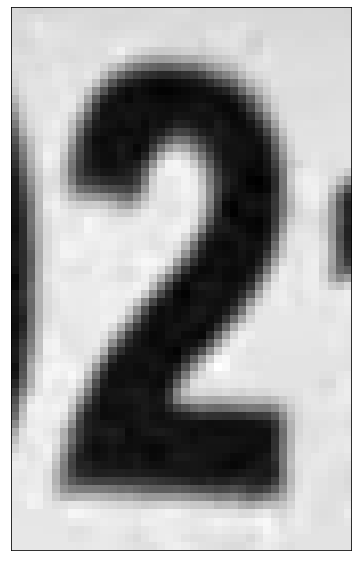

In [85]:
# def image_cut():
    
# тестирование обрезки для тестового набора кртинок
# картинка с ошибкой: 252.png train
# get_image(data['FileName'].iloc[i], data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))
#img_print(get_image('252.png', 77, 246, 219, 81)) # Тестовый вывод изображения
#img_print(252)
# Чтение изображений для traning


im = imread("manual test/22.png")
print('Shape of image:', im.shape)
print('Original image:')
img_print(im)
# n = 251
# im_egt = get_image(data['FileName'].iloc[n], 'train', data['Top'].iloc[n], data['Left'].iloc[n], data['Height'].iloc[n], data['Width'].iloc[n])
# img_print(im_egt)
# i = 251
# folder = 'train'

#test_lab_img = []
#test_lab_img.append(get_image(data['FileName'].iloc[i], folder, data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))
np.array(im).shape
# img_print(test_lab_img[0])
grayscale = rgb2gray(im).astype(np.float32)
img_print(grayscale)


In [41]:
# grayscale_cut = grayscale[Top:Top+Height, Left:Left+Width]
#grayscale_resize = resize(grayscale_cut,(64,32))
#return grayscale_resize

In [73]:
grayscale.shape

(64, 32)

In [89]:
grayscale.shape

(1, 64, 32, 1)

In [88]:
#grayscale_resize = resize(grayscale,(64,32))
grayscale = grayscale_resize.reshape(-1, 64,32, 1)

In [90]:
fm = fashion_model.predict(grayscale)

In [63]:
fm.index(max(fm))

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [67]:
values.index(min(values))

NameError: name 'values' is not defined

In [91]:
np.argmax(fm)

2